In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import datetime as dt
from sqlalchemy import create_engine
pd.set_option('display.max_columns',500)
import sklearn
from sklearn.preprocessing import scale
#from sklearn.preprocessing import Imputer
from sklearn.manifold import TSNE

# WE employ a random state.
RS = 20150101

# We'll use matplotlib for graphics.
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
plt.style.use('seaborn-colorblind')
%matplotlib inline

In [2]:
df_ep = pd.read_csv('data/EpilepsyData.csv', index_col = None, header = 0 )
df_ep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


In [3]:
df_ep.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X72,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X121,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,-14,25,19,6,9,21,13,-37,-58,-33,5,47,80,101,88,73,69,41,-13,-31,-61,-80,-77,-66,-43,5,87,129,121,88,12,-76,-150,-207,-186,-165,-148,-103,-33,40,94,75,8,-81,-155,-227,-262,-233,-218,-187,-126,-65,-12,27,61,49,9,-46,-124,-210,-281,-265,-181,-89,-4,53,53,38,43,31,34,9,-7,-34,-70,-84,-101,-70,-11,42,62,66,74,64,59,56,36,-11,-30,-43,-23,8,42,77,103,135,121,79,59,43,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,312,309,309,303,297,295,295,293,286,279,283,301,308,285,252,215,194,169,111,-74,-388,-679,-892,-949,-972,-1001,-1006,-949,-847,-668,-432,-153,72,226,326,392,461,495,513,511,496,479,453,440,427,414,399,385,385,404,432,444,437,418,392,373,363,365,372,385,388,383,371,360,353,334,303,252,200,153,151,143,48,-206,-548,-859,-1067,-1069,-957,-780,-597,-460,-357,-276,-224,-210,-350,-930,-1413,-1716,-1360,-662,-96,243,323,241,29,-167,-228,-136,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,-15,-30,-47,-53,-65,-64,-68,-85,-98,-109,-82,-57,-38,-40,-36,-31,-13,11,19,9,-20,-48,-71,-71,-57,-32,-13,6,29,27,25,10,-7,-36,-47,-37,-36,-22,-32,-38,-55,-61,-64,-72,-67,-53,-25,-10,-4,-23,-55,-93,-102,-106,-101,-69,-45,-42,-57,-64,-77,-80,-77,-78,-56,-34,-5,10,5,-5,-44,-75,-99,-110,-104,-103,-94,-105,-108,-110,-99,-89,-82,-76,-80,-90,-106,-106,-108,-87,-60,-37,-26,-15,-6,-14,-23,-34,-41,-54,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,-69,-67,-66,-58,-54,-56,-70,-80,-82,-85,-74,-70,-71,-82,-88,-93,-97,-89,-87,-83,-70,-50,-37,-31,-32,-39,-54,-64,-68,-67,-69,-63,-60,-63,-55,-43,-37,-27,-31,-35,-47,-58,-63,-74,-73,-67,-60,-56,-49,-46,-57,-58,-62,-63,-63,-61,-56,-65,-62,-57,-61,-63,-66,-69,-86,-89,-86,-83,-87,-80,-69,-62,-57,-60,-60,-68,-58,-53,-57,-66,-66,-73,-78,-73,-84,-92,-97,-88,-81,-72,-61,-66,-72,-88,-90,-88,-77,-58,-53,-61,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,1,16,14,-14,-42,-56,-45,-45,-45,-38,-47,-45,-37,-3,23,39,27,0,-28,-44,-37,-22,5,30,31,6,-32,-27,-27,2,13,-6,-29,-41,-22,-13,-16,-31,-52,-60,-40,-16,0,14,24,36,39,3

C:\Users\jju9188\AppData\Local\Temp/ipykernel_3692/2737659100.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tgt[tgt>1]=0


The number666 of trials for the non-seizure class is: 9200
The number of trials for the seizure class is: 2300


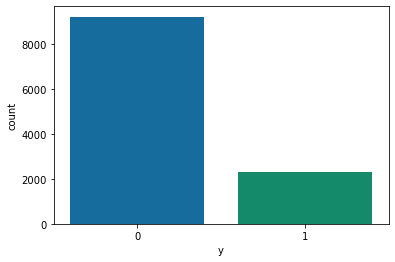

In [4]:
cols = df_ep.columns
tgt = df_ep.y
tgt[tgt>1]=0
ax = sns.countplot(tgt,label="Count")
non_seizure, seizure = tgt.value_counts()
print('The number666 of trials for the non-seizure class is:', non_seizure)
print('The number of trials for the seizure class is:', seizure)

In [5]:
df_ep.isnull().sum()

Unnamed    0
X1         0
X2         0
X3         0
X4         0
          ..
X175       0
X176       0
X177       0
X178       0
y          0
Length: 180, dtype: int64

In [6]:
df_ep.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X72,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X121,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,-5.827478,-6.042174,-6.687304,-7.088870,-7.211217,-7.088261,-6.806696,-6.744696,-6.484783,-6.448435,-6.355391,-6.543130,-6.884348,-6.883217,-6.118870,-5.15913,-4.785652,-4.874783,-5.393565,-5.935478,-6.349913,-6.212522,-5.859826,-5.299826,-4.955652,-5.278087,-6.162261,-7.316609,-7.998522,-7.818870,-6.964087,-5.773826,-4.700783,-4.143826,-4.546087,-5.53200,-6.670435,-7.702348,-7.894696,-8.081391,-7.818174,-7.693913,-7.210783,-6.653391,-6.18313,-5.978174,-6.606696,-7.999043,-9.597826,-11.028435,-11.366522,-10.922261,-9.660696,-8.282957,-7.091217,-6.071217,-5.658087,-5.486609,-5.893304,-5.861826,-5.894087,-5.659739,-5.935130,-6.492174,-7.022435,-7.327739,-7.302174,-7.186174,-7.415304,-8.219043,-9.350783,-10.321043,-10.856348,-10.670870,-10.559217,-10.128957,-9.481565,-8.837

In [7]:
df_ep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


In [8]:
 
X = df_ep.drop(['Unnamed'], axis=1) 

In [9]:
# we transform the target into 0 or 1: 0 for normal brain and 1 for the epileptic seizure
X['y'] = X['y'].apply(lambda x: 1 if x == 1 else 0)

# now we sort for the target
X.sort_values(by='y', inplace=True)

# We split the target off the fetures and store it seperately
y = X['y']
X.drop('y', inplace=True, axis=1)
assert 'y' not in X.columns

# make sure the target is binary now
assert set(y.unique()) == {0, 1}

# we also scale the data
X = scale(X) 

In [10]:
epileptic_proj = TSNE(random_state=RS).fit_transform(X)
epileptic_proj.shape

(11500, 2)

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Epilepsy detection'}>,
 <matplotlib.collections.PathCollection at 0x26e02b97be0>)

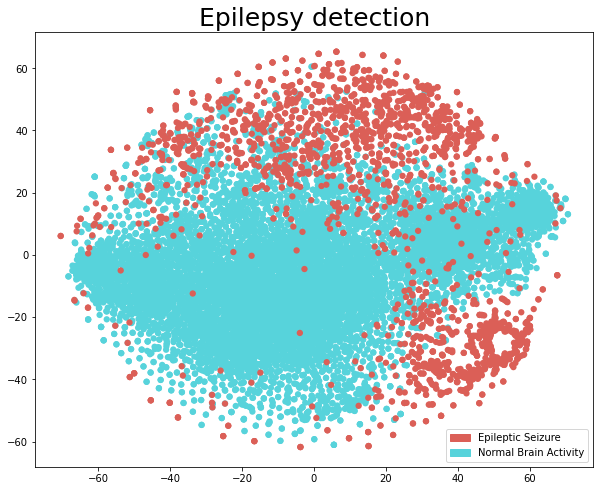

In [11]:
def scatter(x, colors):
    """this function plots the result
    - x is a two dimensional vector
    - colors is a code that tells how to color them: it corresponds to the target
    """
    
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 2)[::-1])

    # We create a scatter plot.
    f = plt.figure(figsize=(10, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)]
                   )
    
    ax.axis('on') # the axis will be shown
    ax.axis('tight') # makes sure all data is shown
    
    # set title
    plt.title("Epilepsy detection", fontsize=25)
    
    # legend with color patches
    epilepsy_patch = mpatches.Patch(color=palette[1], label='Epileptic Seizure')
    normal_patch = mpatches.Patch(color=palette[0], label='Normal Brain Activity')
    plt.legend(handles=[epilepsy_patch, normal_patch], fontsize=10, loc=4)

    return f, ax, sc

# Now we call the scatter plot function on our data
scatter(epileptic_proj, y)

In [12]:
# importing needed libraries
from sklearn.tree import DecisionTreeClassifier # to build a classification tree
from sklearn.model_selection import train_test_split # to split data into training and testing se
from sklearn.model_selection import cross_val_score # for cross validation
from sklearn.metrics import confusion_matrix, classification_report # to create a confusion matri
from sklearn.metrics import plot_confusion_matrix # to draw a confusion matrix
from sklearn.tree import plot_tree # to draw a classification tree
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [13]:
X = df_ep.drop(['y', 'Unnamed'], axis = 1)
y = df_ep['y']

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [16]:
def modeltraintest(vartrain, vartest, y_train, y_test, model):
#Fit the model
    model.fit(vartrain, y_train)
#Predict with the model
    model_pred = model.predict(vartest)
    model_prob = model.predict_proba(vartest)
#Assess with the model
    score = model.score(vartest, y_test)
    print('XXXXXXXXXXXXXXXX ACCURACY SCORE XXXXXXXXXXXXXXXXXX')
    print(round(score, 6))
    print("")
    print('XXXXXXXXXXXXXXXX CONFUSION MATRIX XXXXXXXXXXXXXXXX')
    print(confusion_matrix(y_test, model_pred))
    print("")
    print('XXXXXXXXXXXXXX CLASSIFICATION REPORT XXXXXXXXXXXXXX')
    print(classification_report(y_test, model_pred))
    print('')
    print('XXXXXXXXXXXXXX ROC AUC SCORE AND CHART XXXXXXXXXXXXXXXXXX')
    print('')
    y_pred_prob = model.predict_proba(vartest)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot([0, 1], [0, 1],'k--')
    plt.plot(fpr, tpr, label='Model')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC Curve')
    plt.show();
# calculate roc curve
    y_pred_prob = model.predict_proba(vartest)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    roc_auc_format = 'ROC AUC Score: {0:.4f}'.format(roc_auc)
    print(roc_auc_format)
    print('')
    print('XXXXXXXXXXXXXX CROSS VALIDATION XXXXXXXXXXXXXXXXXX')
    print('')
    cv_scores = cross_val_score(model, vartrain, y_train, cv=5,
    scoring='accuracy')
    print('CV Accuracy Scores:')
    print(cv_scores)
    print('')
    cv_rocauc = cross_val_score(model, vartrain, y_train, cv=5,
    scoring='roc_auc')
    print('CV ROC AUC:')
    print(cv_rocauc)
    print('')
    print('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX')

In [17]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [18]:
# grid search
vartrain = X_train
vartest = X_test
grid={"criterion": ['gini', 'entropy'], "max_depth" : [10, 13, 15, 17, 19, 21, 23],
"n_estimators" : [20], "max_features" : [10, 11, 13, 14, 17],
"class_weight": [None]}
model_random = RandomForestClassifier(random_state=21)
model_cv=RandomizedSearchCV(model_random,grid,cv=5)
model_cv.fit(vartrain,y_train)
print("tuned hyperparameters :(best parameters) ",model_cv.best_params_)
print("accuracy :", model_cv.best_score_)

tuned hyperparameters :(best parameters)  {'n_estimators': 20, 'max_features': 14, 'max_depth': 17, 'criterion': 'entropy', 'class_weight': None}
accuracy : 0.9665838509316771


XXXXXXXXXXXXXXXX ACCURACY SCORE XXXXXXXXXXXXXXXXXX
0.973043

XXXXXXXXXXXXXXXX CONFUSION MATRIX XXXXXXXXXXXXXXXX
[[2706   46]
 [  47  651]]

XXXXXXXXXXXXXX CLASSIFICATION REPORT XXXXXXXXXXXXXX
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2752
           1       0.93      0.93      0.93       698

    accuracy                           0.97      3450
   macro avg       0.96      0.96      0.96      3450
weighted avg       0.97      0.97      0.97      3450


XXXXXXXXXXXXXX ROC AUC SCORE AND CHART XXXXXXXXXXXXXXXXXX



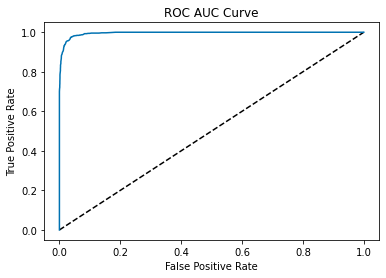

ROC AUC Score: 0.9957

XXXXXXXXXXXXXX CROSS VALIDATION XXXXXXXXXXXXXXXXXX

CV Accuracy Scores:
[0.96832298 0.97515528 0.96583851 0.97267081 0.97204969]

CV ROC AUC:
[0.99247093 0.99643169 0.99247335 0.99619474 0.99261786]

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


In [19]:
# defining random forest model
vartrain = X_train
vartest = X_test
model = RandomForestClassifier(random_state=21)
modeltraintest(vartrain, vartest, y_train, y_test, model)

In [20]:
def shorttraintest(vartrain, vartest, y_train, y_test, model):

    #Fit the model
    model.fit(vartrain, y_train)

    #Predict with the model

    model_pred = model.predict(vartest)

    model_prob = model.predict_proba(vartest)

    print('Confusion Matrix:')

    print(confusion_matrix(y_test, model_pred))

    print("")

    #Assess with the model

    score = model.score(vartest, y_test)

    score_format = 'Accuracy Score: {0:.4f}'.format(score)

    print(score_format)

    recall = recall_score(y_test, model_pred)

    recall_format = 'Recall Score: {0:.4f}'.format(recall)

    print(recall_format)

    precision = precision_score(y_test, model_pred)

    precision_format = 'Precision Score: {0:.4f}'.format(precision)

    print(precision_format)
# calculate roc curve

y_pred_prob = model.predict_proba(vartest)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
roc_auc_format = 'ROC AUC Score: {0:.4f}'.format(roc_auc)
print(roc_auc_format)
print('')

ROC AUC Score: 0.9957



In [21]:
# optimal model
vartrain = X_train
vartest = X_test
model = RandomForestClassifier(max_depth=13, max_features = 11, n_estimators = 20, class_weight=None, criterion = 'gini', random_state=21)
shorttraintest(vartrain, vartest, y_train, y_test, model)


Confusion Matrix:
[[2711   41]
 [  91  607]]

Accuracy Score: 0.9617
Recall Score: 0.8696
Precision Score: 0.9367


In [22]:
# CodeBlock SubSection 5.3
# checking class weight 
cw = [None, 'balanced', {0:1, 1:1.5}, {0:1, 1:2}, {0:1, 1:2.5}, {0:1, 1:3}, {0:1, 1:4}, {0:1, 1:4.5},{0:1, 1:5
}, {0:1, 1:5.5},{0:1, 1:10}, {0:1, 1:100}]

vartrain = X_train
vartest = X_test

for w in cw:
    print('----------------------')
    vartitle = "Model with Class Weight: " + str(w)
    varcw = w
    model = RandomForestClassifier(max_depth=19, max_features = 13, n_estimators = 100, class_weight=varcw,  random_state=21)
    print(vartitle)
    print('')
    shorttraintest(vartrain, vartest, y_train, y_test, model)
    print('----------------------')
    

----------------------
Model with Class Weight: None

Confusion Matrix:
[[2719   33]
 [  71  627]]

Accuracy Score: 0.9699
Recall Score: 0.8983
Precision Score: 0.9500
----------------------
----------------------
Model with Class Weight: balanced

Confusion Matrix:
[[2725   27]
 [  92  606]]

Accuracy Score: 0.9655
Recall Score: 0.8682
Precision Score: 0.9573
----------------------
----------------------
Model with Class Weight: {0: 1, 1: 1.5}

Confusion Matrix:
[[2720   32]
 [  71  627]]

Accuracy Score: 0.9701
Recall Score: 0.8983
Precision Score: 0.9514
----------------------
----------------------
Model with Class Weight: {0: 1, 1: 2}

Confusion Matrix:
[[2722   30]
 [  72  626]]

Accuracy Score: 0.9704
Recall Score: 0.8968
Precision Score: 0.9543
----------------------
----------------------
Model with Class Weight: {0: 1, 1: 2.5}

Confusion Matrix:
[[2726   26]
 [  72  626]]

Accuracy Score: 0.9716
Recall Score: 0.8968
Precision Score: 0.9601
----------------------
-------------

In [23]:
vartrain = X_train
vartest = X_test
model = RandomForestClassifier(max_depth=19, max_features = 13, n_estimators = 100, class_weight={0: 1, 1: 1.5},  random_state=21)
shorttraintest(vartrain, vartest, y_train, y_test, model)

Confusion Matrix:
[[2720   32]
 [  71  627]]

Accuracy Score: 0.9701
Recall Score: 0.8983
Precision Score: 0.9514
